# Team 5 - Global Terrorism

![](https://static.euronews.com/articles/stories/04/44/85/80/1440x810_cmsv2_42163f70-0149-51fc-91a2-6608636a809b-4448580.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/START-UMD/gtd)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository.
- Submit your works through Google Form (Link on Learning Portal)

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Start your codes here!
import pandas as pd
df =pd.read_csv('/content/drive/My Drive/FTMLE - Philippines/Week 3/assignments/datasets/05-global-terrorism/terrorism.csv',encoding='ISO-8859-1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#sort data for only in USA
ww = df[['eventid','iyear','imonth','iday','country_txt','city','provstate','weaptype1_txt','weapsubtype1_txt','targtype1_txt','targsubtype1_txt','target1','weapdetail','success','nkill','nkillus','nkillter','nwound','nwoundus','propvalue']]
usw = ww[ww['country_txt']=='United States']
usw.head(5)

,eventid,iyear,imonth,iday,country_txt,city,provstate,weaptype1_txt,weapsubtype1_txt,targtype1_txt,targsubtype1_txt,target1,weapdetail,success,nkill,nkillus,nkillter,nwound,nwoundus,propvalue
5,197001010002,1970,1,1,United States,Cairo,Illinois,Firearms,Unknown Gun Type,Police,"Police Building (headquarters, station, school)",Cairo Police Headquarters,Several gunshots were fired.,1,0.0,0.0,0.0,0.0,0.0,NaN
7,197001020002,1970,1,2,United States,Oakland,California,Explosives,Unknown Explosive Type,Utilities,Electricity,Edes Substation,NaN,1,0.0,0.0,0.0,0.0,0.0,22500.0
8,197001020003,1970,1,2,United States,Madison,Wisconsin,Incendiary,Molotov Cocktail/Petrol Bomb,Military,Military Recruiting Station/Academy,"R.O.T.C. offices at University of Wisconsin, M...",Firebomb consisting of gasoline,1,0.0,0.0,0.0,0.0,0.0,60000.0
9,197001030001,1970,1,3,United States,Madison,Wisconsin,Incendiary,Gasoline or Alcohol,Government (General),Government Building/Facility/Office,Selective Service Headquarters in Madison Wisc...,Poured gasoline on the floor and lit it with a...,1,0.0,0.0,0.0,0.0,0.0,NaN
10,197001050001,1970,1,1,United States,Baraboo,Wisconsin,Explosives,Unknown Explosive Type,Military,Military Barracks/Base/Headquarters/Checkpost,Badger Army ammo depot.,Explosive,0,0.0,NaN,NaN,0.0,NaN,0.0


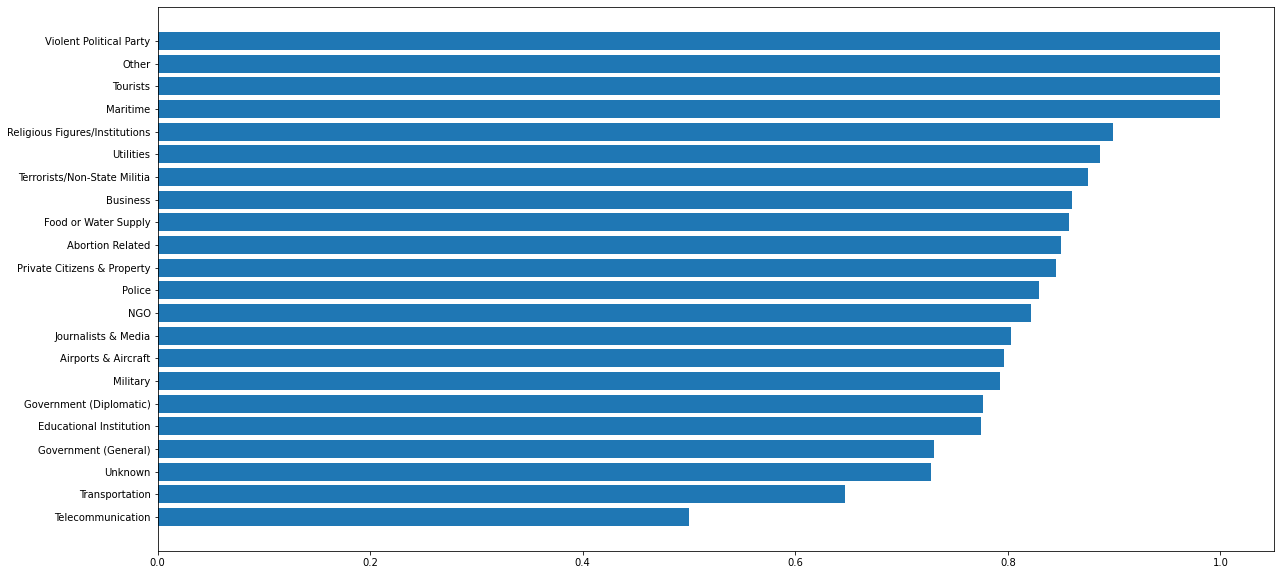

In [ ]:
#@title Success Rate for each targettype type
#Success Rate for each targettype type
tw = usw.groupby(['targtype1_txt']).mean()[['success']]
tw = tw.sort_values(by = 'success')
plt.figure(figsize = (20,10))
plt.barh(y=tw.index, width = 'success',data = tw)
plt.show()

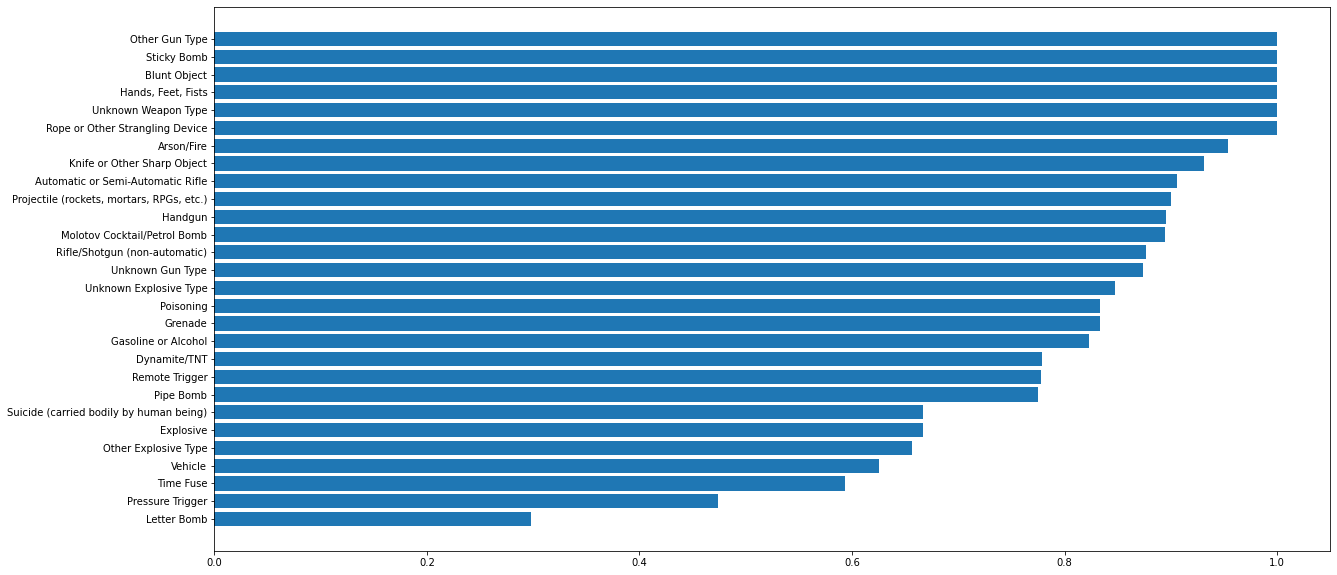

In [ ]:
#@title Success Rate for weapon Type
tw = usw.groupby(['weapsubtype1_txt']).mean()[['success']]
tw = tw.sort_values(by = 'success')
plt.figure(figsize = (20,10))
plt.barh(y=tw.index, width = 'success',data = tw)
plt.show()

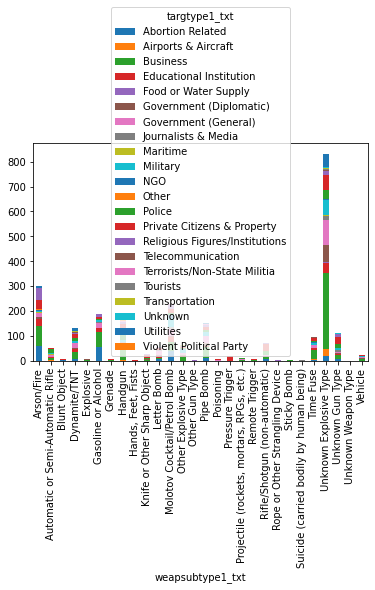

In [ ]:
wt = usw.groupby(['weapsubtype1_txt','targtype1_txt']).count()[['eventid']]
wt = wt.reset_index(level=[0,1])
wt = wt.pivot('weapsubtype1_txt','targtype1_txt','eventid')

wt.plot.bar(stacked = True)
plt.show()

# **State - Explosions**





In [ ]:
#@title Sort by explosive
ew = usw[usw['weaptype1_txt']=='Explosives']
ew = ew.groupby('provstate').count()[['eventid']]
ew1 = ew.sort_values('eventid',ascending = False)
ew1 = ew1.head(5)
ew1

,eventid
provstate,
California,336
New York,299
Puerto Rico,181
Florida,92
Illinois,57


In [ ]:
#@title Sort by explosives in California
#
caw = usw[(usw['weaptype1_txt']=='Explosives') & (usw['provstate']=='California')]
caw = caw.groupby('weapsubtype1_txt').count()[['eventid']]
caw = caw.sort_values('eventid',ascending=False).head(5)
caw = caw.rename(index = {'Unknown Explosive Type':'Unknown','Other Explosive Type':'Others'})
caw

In [ ]:
#@title Sort by explosives in New York
#
nyw = usw[(usw['weaptype1_txt']=='Explosives') & (usw['provstate']=='New York')]
nyw = nyw.groupby('weapsubtype1_txt').count()[['eventid']]
nyw = nyw.sort_values('eventid',ascending=False).head(5)
nyw = nyw.rename(index = {'Unknown Explosive Type':'Unknown','Other Explosive Type':'Others'})
nyw

In [ ]:
#@title Sort by explosives in Puerto Rico
#
pew = usw[(usw['weaptype1_txt']=='Explosives') & (usw['provstate']=='New York')]
pew = pew.groupby('weapsubtype1_txt').count()[['eventid']]
pew = pew.sort_values('eventid',ascending=False).head(5)
pew = pew.rename(index = {'Unknown Explosive Type':'Unknown','Other Explosive Type':'Others'})
pew

In [ ]:
#@title Sort by explosives in Florida
#
fw = usw[(usw['weaptype1_txt']=='Explosives') & (usw['provstate']=='New York')]
fw = fw.groupby('weapsubtype1_txt').count()[['eventid']]
fw = fw.sort_values('eventid',ascending=False).head(5)
fw = fw.rename(index = {'Unknown Explosive Type':'Unknown','Other Explosive Type':'Others'})
fw

In [ ]:
#@title Sort by explosives in Illanois
#
iw = usw[(usw['weaptype1_txt']=='Explosives') & (usw['provstate']=='New York')]
iw = iw.groupby('weapsubtype1_txt').count()[['eventid']]
iw = iw.sort_values('eventid',ascending=False).head(5)
iw = iw.rename(index = {'Unknown Explosive Type':'Unknown','Other Explosive Type':'Others'})
iw

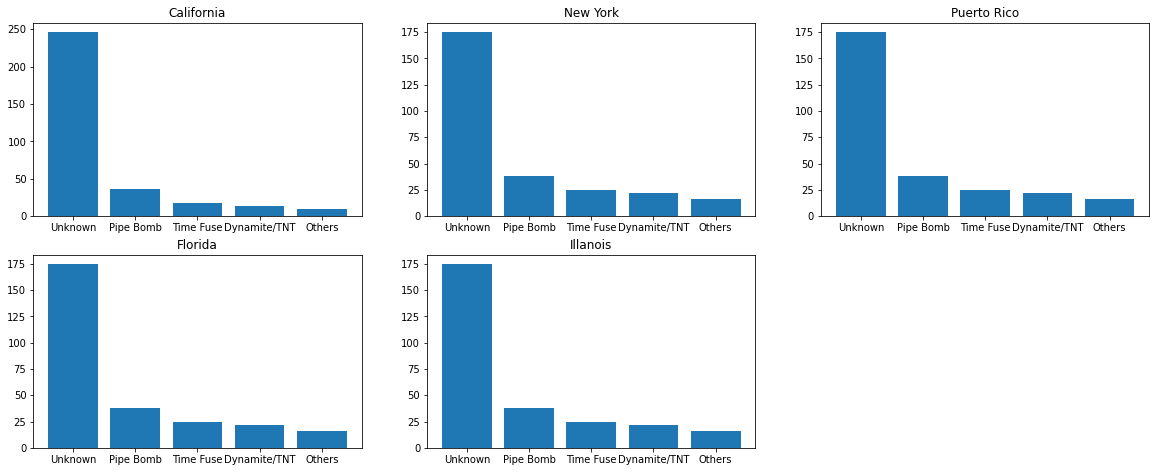

In [ ]:
#@title Chart explosives in states
plt.figure(figsize=(20,5))
plt.subplot(2,3,1)
plt.subplots_adjust(bottom=-0.3)
#This will create the bar graph for poulation
pop = plt.bar(caw.index, 'eventid',data = caw)
#The below code will create the second plot.
plt.title('California')
plt.subplot(2,3,2)
#This will create the bar graph for gdp i.e gdppercapita divided by population.
pop = plt.bar(nyw.index, 'eventid',data = nyw)
plt.title('New York')
plt.subplot(2,3,3)
pop = plt.bar(pew.index, 'eventid',data = pew)
plt.title('Puerto Rico')
plt.subplot(2,3,4)
pop = plt.bar(fw.index, 'eventid',data = fw)
plt.title('Florida')
plt.subplot(2,3,5)
plt.title('Illanois')
pop = plt.bar(iw.index, 'eventid',data = iw)
plt.show()


# **State - Firearms**

In [ ]:
#@title Sort by Firearms
gw = usw[usw['weaptype1_txt']=='Firearms']
gw = gw.groupby('provstate').count()[['eventid']]
gw1 = gw.sort_values('eventid',ascending = False)
gw1 = gw1.head(5)
gw1

In [ ]:
#@title Sort by Firearms By CA
cag = usw[(usw['weaptype1_txt']=='Firearms') & (usw['provstate']=='California')]
cag = cag.groupby('weapsubtype1_txt').count()[['eventid']]
cag = cag.sort_values('eventid',ascending=False).head(5)
cag = cag.rename(index = {'Unknown Gun Type':'Unknown','Rifle/Shotgun (non-automatic)':'Rifle/Shotgun','Automatic or Semi-Automatic Rifle':'Automatic'})
cag

In [ ]:
#@title Sort by Firearms By NY
nyg = usw[(usw['weaptype1_txt']=='Firearms') & (usw['provstate']=='New York')]
nyg = nyg.groupby('weapsubtype1_txt').count()[['eventid']]
nyg = nyg.sort_values('eventid',ascending=False).head(5)
nyg = nyg.rename(index = {'Unknown Gun Type':'Unknown','Rifle/Shotgun (non-automatic)':'Rifle/Shotgun','Automatic or Semi-Automatic Rifle':'Automatic','Other Gun Type':'Others'})
nyg

In [ ]:
#@title Sort by Firearms By PR
peg = usw[(usw['weaptype1_txt']=='Firearms') & (usw['provstate']=='Puerto Rico')]
peg = peg.groupby('weapsubtype1_txt').count()[['eventid']]
peg = peg.sort_values('eventid',ascending=False).head(5)
peg = peg.rename(index = {'Unknown Gun Type':'Unknown','Rifle/Shotgun (non-automatic)':'Rifle/Shotgun','Automatic or Semi-Automatic Rifle':'Automatic','Other Gun Type':'Others'})
peg

In [ ]:
#@title Sort by Firearms By Illinois
ig = usw[(usw['weaptype1_txt']=='Firearms') & (usw['provstate']=='Illinois')]
ig = ig.groupby('weapsubtype1_txt').count()[['eventid']]
ig = ig.sort_values('eventid',ascending=False).head(5)
ig = ig.rename(index = {'Unknown Gun Type':'Unknown','Rifle/Shotgun (non-automatic)':'Rifle/Shotgun','Automatic or Semi-Automatic Rifle':'Automatic','Other Gun Type':'Others'})
ig

In [ ]:
#@title Sort by Firearms By Texas
tg = usw[(usw['weaptype1_txt']=='Firearms') & (usw['provstate']=='Texas')]
tg = tg.groupby('weapsubtype1_txt').count()[['eventid']]
tg = tg.sort_values('eventid',ascending=False).head(5)
tg = tg.rename(index = {'Unknown Gun Type':'Unknown','Rifle/Shotgun (non-automatic)':'Rifle/Shotgun','Automatic or Semi-Automatic Rifle':'Automatic','Other Gun Type':'Others'})
tg

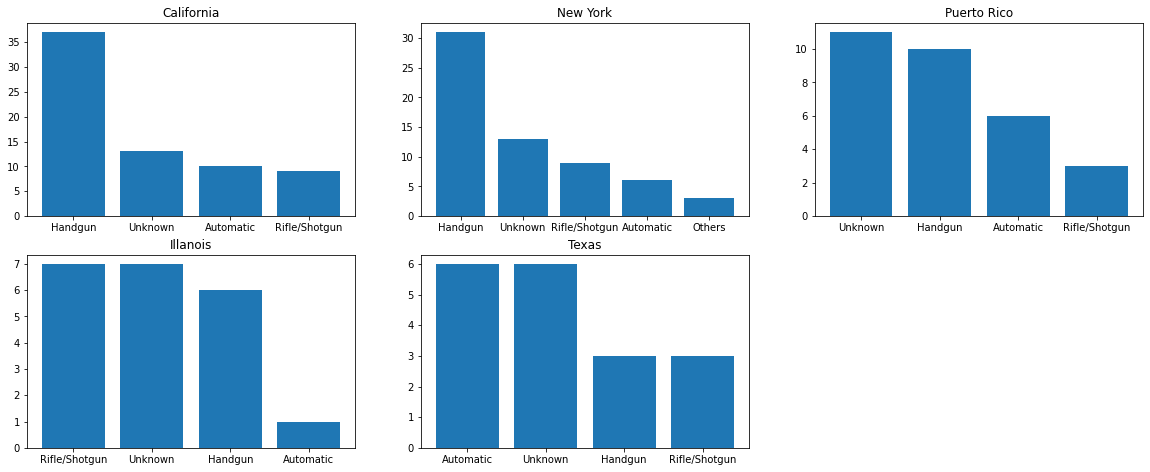

In [ ]:
#@title Chart Sort by Firearms By State
plt.figure(figsize=(20,5))
plt.subplot(2,3,1)
plt.subplots_adjust(bottom=-0.3)
plt.title('California')
pop = plt.bar(cag.index, 'eventid',data = cag)
plt.subplot(2,3,2)
plt.title('New York')
pop = plt.bar(nyg.index, 'eventid',data = nyg)
plt.subplot(2,3,3)
plt.title('Puerto Rico')
pop = plt.bar(peg.index, 'eventid',data = peg)
plt.subplot(2,3,4)
plt.title('Illanois')
pop = plt.bar(ig.index, 'eventid',data = ig)
plt.subplot(2,3,5)
plt.title('Texas')
pop = plt.bar(tg.index, 'eventid',data = tg)
plt.show()

-> Texas allow the possesion of automatics if the machine gun was properly registered under federal law

-> Waiting period in Illanois: Handgun: 72 hours. 24 hours for a shotgun or rifle

# **Incendiary by State**





In [ ]:
#@title Sort by Incendiary  
iw = usw[usw['weaptype1_txt']=='Incendiary']
iw = iw.groupby('provstate').count()[['eventid']]
iw = iw.sort_values('eventid',ascending = False)
iw = iw.head(5)
iw

,eventid
provstate,
California,165
New York,117
Florida,43
Oregon,39
Washington,36


In [ ]:
#@title Sort By California
cai = usw[(usw['weaptype1_txt']=='Incendiary') & (usw['provstate']=='California')]
cai = cai.groupby('weapsubtype1_txt').count()[['eventid']]
cai = cai.sort_values('eventid',ascending=False).head(5)
#cai = cai.rename(index = {'Unknown Gun Type':'Unknown','Rifle/Shotgun (non-automatic)':'Rifle/Shotgun','Automatic or Semi-Automatic Rifle':'Automatic'})
cai

In [ ]:
#@title Sort By New York
nyi = usw[(usw['weaptype1_txt']=='Incendiary') & (usw['provstate']=='New York')]
nyi = nyi.groupby('weapsubtype1_txt').count()[['eventid']]
nyi = nyi.sort_values('eventid',ascending=False).head(5)
#nyi = nyi.rename(index = {'Unknown Gun Type':'Unknown','Rifle/Shotgun (non-automatic)':'Rifle/Shotgun','Automatic or Semi-Automatic Rifle':'Automatic'})
nyi

In [ ]:
#@title Sort By Florida
fi = usw[(usw['weaptype1_txt']=='Incendiary') & (usw['provstate']=='Florida')]
fi = fi.groupby('weapsubtype1_txt').count()[['eventid']]
fi = fi.sort_values('eventid',ascending=False).head(5)
#fi = fi.rename(index = {'Unknown Gun Type':'Unknown','Rifle/Shotgun (non-automatic)':'Rifle/Shotgun','Automatic or Semi-Automatic Rifle':'Automatic'})
fi

In [ ]:
#@title Sort By Oregon
oi = usw[(usw['weaptype1_txt']=='Incendiary') & (usw['provstate']=='Oregon')]
oi = oi.groupby('weapsubtype1_txt').count()[['eventid']]
oi = oi.sort_values('eventid',ascending=False).head(5)
#oi = oi.rename(index = {'Unknown Gun Type':'Unknown','Rifle/Shotgun (non-automatic)':'Rifle/Shotgun','Automatic or Semi-Automatic Rifle':'Automatic'})
oi

In [ ]:
#@title Sort By Washington
wi = usw[(usw['weaptype1_txt']=='Incendiary') & (usw['provstate']=='Washington')]
wi = wi.groupby('weapsubtype1_txt').count()[['eventid']]
wi = wi.sort_values('eventid',ascending=False).head(5)
#wi = wi.rename(index = {'Unknown Gun Type':'Unknown','Rifle/Shotgun (non-automatic)':'Rifle/Shotgun','Automatic or Semi-Automatic Rifle':'Automatic'})
wi

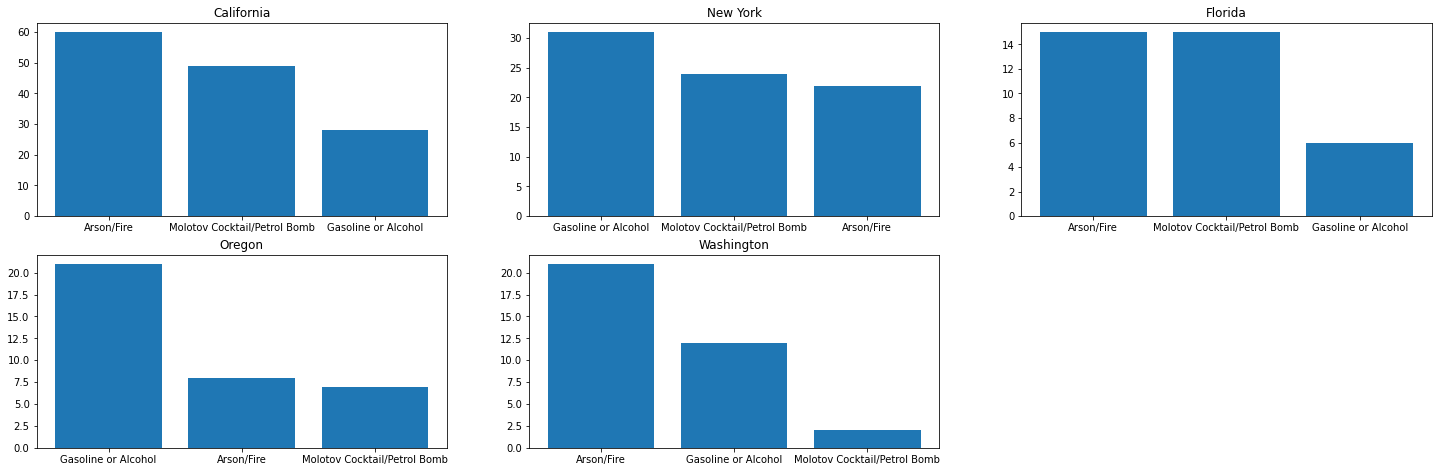

In [ ]:
#@title Chart for Incendiary
plt.figure(figsize=(25,5))
plt.subplot(2,3,1)
plt.subplots_adjust(bottom=-0.3)
plt.title('California')
pop = plt.bar(cai.index, 'eventid',data = cai)
plt.subplot(2,3,2)
plt.title('New York')
pop = plt.bar(nyi.index, 'eventid',data = nyi)
plt.subplot(2,3,3)
plt.title('Florida')
pop = plt.bar(fi.index, 'eventid',data = fi)
plt.subplot(2,3,4)
plt.title('Oregon')
pop = plt.bar(oi.index, 'eventid',data = oi)
plt.subplot(2,3,5)
plt.title('Washington')
pop = plt.bar(wi.index, 'eventid',data = wi)
plt.show()

# **Weapons by Time**

In [ ]:
#@title Weapons Type by year
ft = usw[usw['weaptype1_txt']=='Firearms'].groupby('iyear').count()[['eventid']]
ft.rename(columns ={'eventid': 'Firearms'},inplace = True)
it = usw[usw['weaptype1_txt']=='Incendiary'].groupby('iyear').count()[['eventid']]
it.rename(columns ={'eventid': 'Incendiary'},inplace = True)
et = usw[usw['weaptype1_txt']=='Explosives'].groupby('iyear').count()[['eventid']]
et.rename(columns ={'eventid': 'Explosives'},inplace = True)
wt = pd.concat([ft, it, et],axis = 1)
wt = wt.fillna(0)
wt

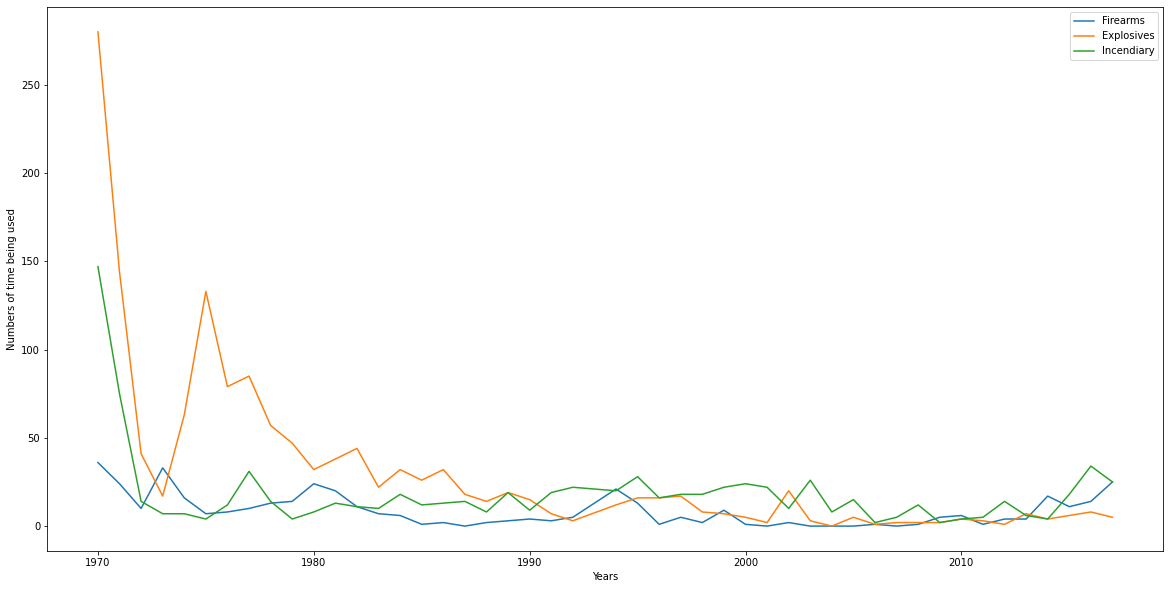

In [ ]:
#@title Chart for weapons by time
plt.figure(figsize=(20, 10))
plt.plot(wt.index,'Firearms' , data = wt,label='Firearms')
plt.plot(wt.index,'Explosives' , data = wt,label='Explosives')
plt.plot(wt.index,'Incendiary' , data = wt,label='Incendiary')
plt.xlabel('Years')
plt.ylabel('Numbers of time being used')

plt.legend()
plt.show()

# Explosions by Time

In [ ]:
#@title Top 5 Explosives
ebt = usw[usw['weaptype1_txt']=='Explosives']
ebt = ebt.groupby('weapsubtype1_txt').count()[['eventid']]
ebt = ebt.sort_values('eventid',ascending=False).head(5)
ebt

,eventid
weapsubtype1_txt,
Unknown Explosive Type,832
Pipe Bomb,151
Dynamite/TNT,131
Time Fuse,96
Other Explosive Type,64


In [ ]:
#@title Pipe Bomb
pb = usw[(usw['weaptype1_txt']=='Explosives') & (usw['weapsubtype1_txt']=='Pipe Bomb')].groupby('iyear').count()[['eventid']]
pb.rename(columns ={'eventid': 'Pipe Bomb'},inplace = True)
pb

In [ ]:
#@title TNT
tnt = usw[(usw['weaptype1_txt']=='Explosives') & (usw['weapsubtype1_txt']=='Dynamite/TNT')].groupby('iyear').count()[['eventid']]
tnt.rename(columns ={'eventid': 'Dynamite/TNT'},inplace = True)
tnt

In [ ]:
#@title Time Fuse
tf = usw[(usw['weaptype1_txt']=='Explosives') & (usw['weapsubtype1_txt']=='Time Fuse')].groupby('iyear').count()[['eventid']]
tf.rename(columns ={'eventid': 'Time Fuse'},inplace = True)
tf

In [ ]:
#@title Concat  
ext = pd.concat([pb, tnt, tf],axis = 1)
ext = ext.fillna(0)
ext

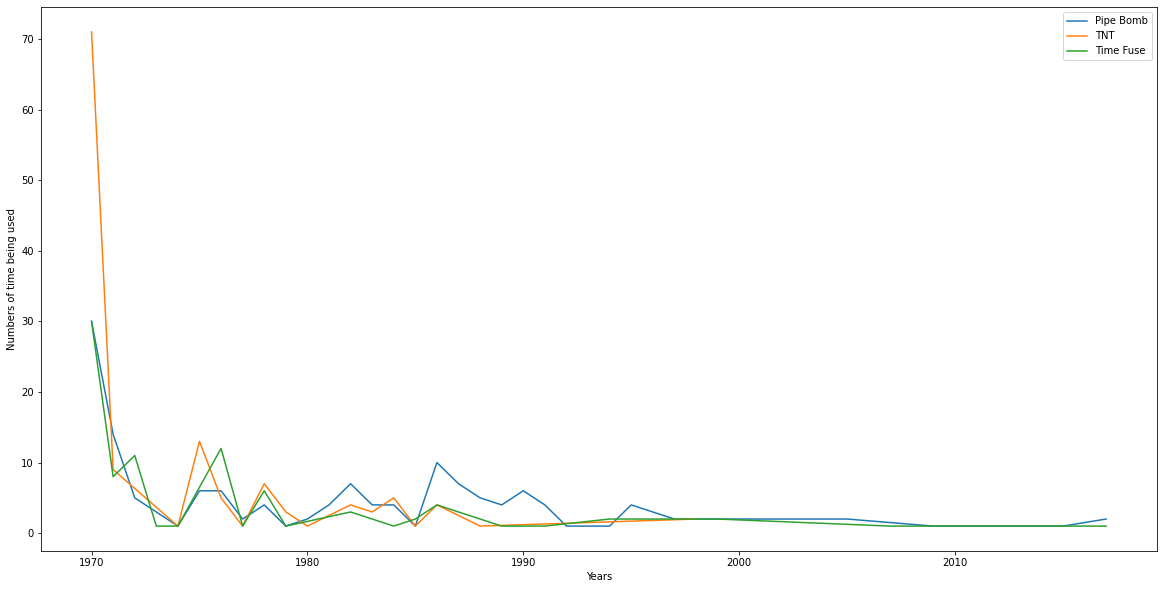

In [ ]:
#@title Chart Explosives by Time  
plt.figure(figsize=(20, 10))
plt.plot(pb.index,'Pipe Bomb' , data = pb,label='Pipe Bomb')
plt.plot(tnt.index,'Dynamite/TNT' , data = tnt,label='TNT')
plt.plot(tf.index,'Time Fuse' , data = tf,label='Time Fuse')
plt.xlabel('Years')
plt.ylabel('Numbers of time being used')

plt.legend()
plt.show()

# **Firearms by Time**

In [ ]:
#@title Top 5 Fire Arms
fbt = usw[usw['weaptype1_txt']=='Firearms']
fbt = fbt.groupby('weapsubtype1_txt').count()[['eventid']]
fbt = fbt.sort_values('eventid',ascending=False).head(5)
fbt

,eventid
weapsubtype1_txt,
Handgun,162
Unknown Gun Type,111
Rifle/Shotgun (non-automatic),73
Automatic or Semi-Automatic Rifle,53
Other Gun Type,3


In [ ]:
#@title Handgun
hg = usw[(usw['weaptype1_txt']=='Firearms') & (usw['weapsubtype1_txt']=='Handgun')].groupby('iyear').count()[['eventid']]
hg.rename(columns ={'eventid': 'Handgun'},inplace = True)
hg

In [ ]:
#@title Riffle
rs = usw[(usw['weaptype1_txt']=='Firearms') & (usw['weapsubtype1_txt']=='Rifle/Shotgun (non-automatic)')].groupby('iyear').count()[['eventid']]
rs.rename(columns ={'eventid': 'Rifle/Shotgun'},inplace = True)
rs

In [ ]:
#@title Automatics
au = usw[(usw['weaptype1_txt']=='Firearms') & (usw['weapsubtype1_txt']=='Automatic or Semi-Automatic Rifle')].groupby('iyear').count()[['eventid']]
au.rename(columns ={'eventid': 'Automatics'},inplace = True)
au

In [ ]:
#@title Concat
fa = pd.concat([hg,rs,au],axis = 1)
fa.fillna(0,inplace = True)
fa

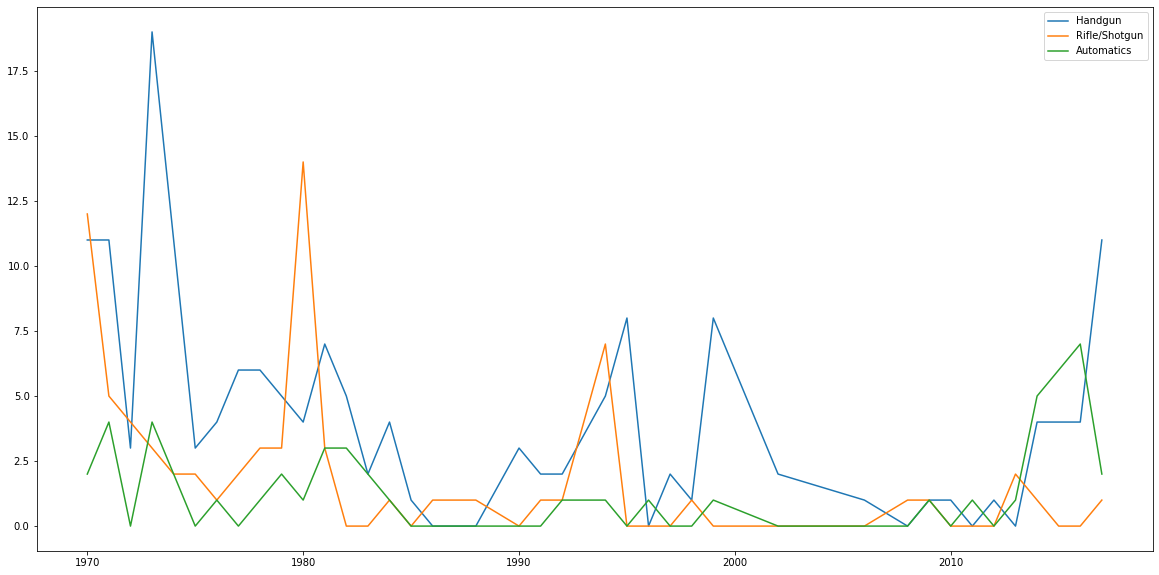

In [ ]:
#@title Chart for Fire Arms
plt.figure(figsize = (20,10))
plt.plot(fa.index,'Handgun',data = fa,label = 'Handgun')
plt.plot(fa.index,'Rifle/Shotgun',data = fa,label = 'Rifle/Shotgun')
plt.plot(fa.index,'Automatics',data = fa,label = 'Automatics')
plt.legend()
plt.show()

# **Incendiary**

In [ ]:
#@title Top 5 Incendiary
ibt = usw[usw['weaptype1_txt']=='Incendiary']
ibt = ibt.groupby('weapsubtype1_txt').count()[['eventid']]
ibt = ibt.sort_values('eventid',ascending=False).head(5)
ibt

,eventid
weapsubtype1_txt,
Arson/Fire,300
Molotov Cocktail/Petrol Bomb,228
Gasoline or Alcohol,186


In [ ]:
#@title Fire
af = usw[(usw['weaptype1_txt']=='Incendiary') & (usw['weapsubtype1_txt']=='Arson/Fire')].groupby('iyear').count()[['eventid']]
af.rename(columns ={'eventid': 'Arson/Fire'},inplace = True)
af

In [ ]:
#@title PB
mp = usw[(usw['weaptype1_txt']=='Incendiary') & (usw['weapsubtype1_txt']=='Molotov Cocktail/Petrol Bomb')].groupby('iyear').count()[['eventid']]
mp.rename(columns ={'eventid': 'Molotov Cocktail/Petrol Bomb'},inplace = True)
mp

In [ ]:
#@title Gasoline
ga = usw[(usw['weaptype1_txt']=='Incendiary') & (usw['weapsubtype1_txt']=='Gasoline or Alcohol')].groupby('iyear').count()[['eventid']]
ga.rename(columns ={'eventid': 'Gasoline or Alcohol'},inplace = True)
ga

In [ ]:
#@title Concat
inc = pd.concat([af,mp,ga],axis =1 )
inc.fillna(0,inplace = True)

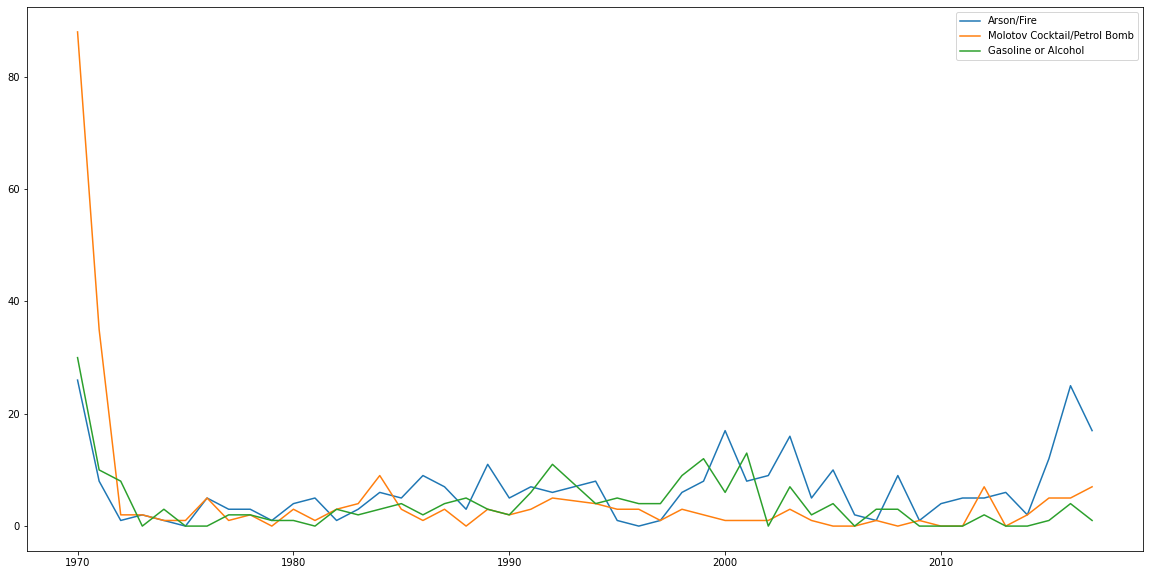

In [ ]:
#@title Chart for Incediary
plt.figure(figsize = (20,10))
plt.plot(inc.index,'Arson/Fire',data = inc,label = 'Arson/Fire')
plt.plot(inc.index,'Molotov Cocktail/Petrol Bomb',data = inc,label = 'Molotov Cocktail/Petrol Bomb')
plt.plot(inc.index,'Gasoline or Alcohol',data = inc,label = 'Gasoline or Alcohol')
plt.legend()
plt.show()